In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# pd.options.display.max_rows = None
# pd.options.display.max_columns = None
# pd.options.display.max_colwidth = None

In [2]:
df = pd.read_csv(Path('housing_data.csv'))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df = pd.read_csv(Path('housing_data.csv'), index_col = 'Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


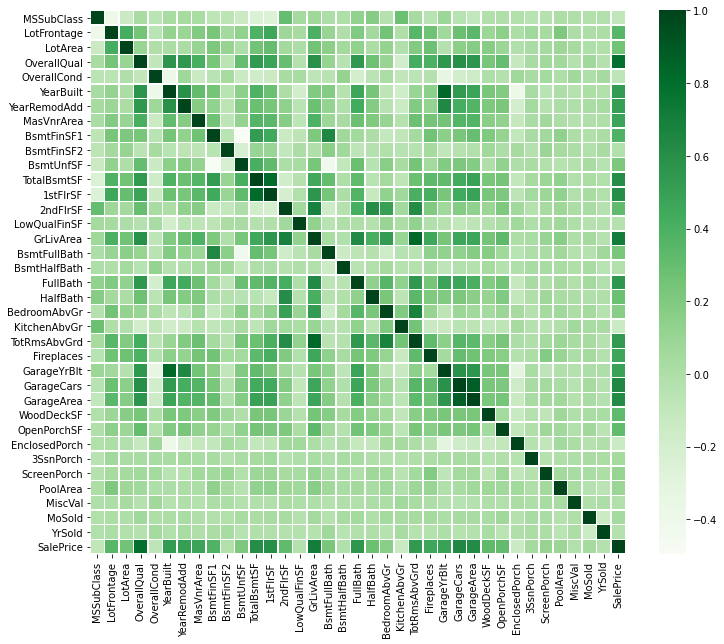

In [4]:
# find the correlation between columns
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(), ax = ax, linewidths=.5, cmap="Greens")

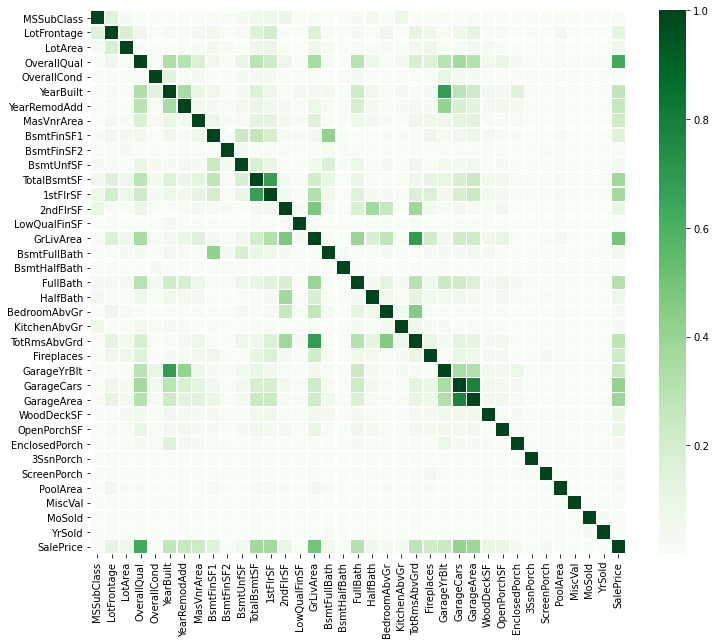

In [5]:
# find the correlation between columns
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr()**2, ax = ax, linewidths=.5, cmap="Greens")

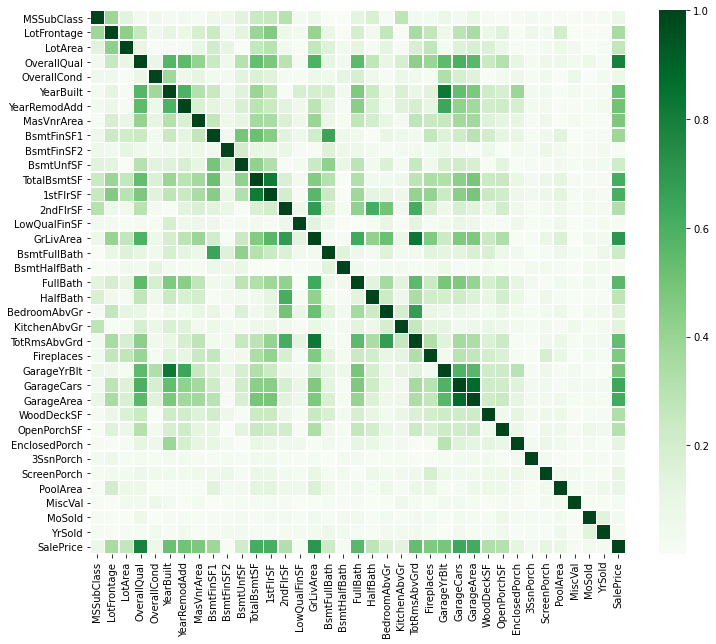

In [6]:
# find the correlation between columns
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(abs(df.corr()), ax = ax, linewidths=.5, cmap="Greens")

In [7]:
df.shape


(1460, 80)

In [8]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
# dir(df.info())

In [11]:
#drop all the rows that contain null values using dropna
#this method doesn't work, cause it will remove all columns that contain null values

# df.dropna(axis=0, how="any", subset=['SalePrice'], inplace=True) #axis=0 is row  #axis=1 is column
# df.dropna(how="any", inplace=True)

# clean_df = df.fillna("", inplace=False)

# clean_df
# plt.hist(df['SalePrice'],bins = 80);
# plt.title ('House Prices');
# plt.xlabel ('Prices');
# plt.ylabel ('Count');

In [12]:
# Drop the columns that have too many null values 
#(which are not useful data for what we're trying to predict)
#Threshold > 1000

df.count()>1000



MSSubClass       True
MSZoning         True
LotFrontage      True
LotArea          True
Street           True
                 ... 
MoSold           True
YrSold           True
SaleType         True
SaleCondition    True
SalePrice        True
Length: 80, dtype: bool

In [13]:
# Select only the column names that contain over 1000 values.

#columns==True is >1000
columns = df.count()>1000
columns_true = columns[columns==True].index
len(columns_true)


75

In [14]:
# Collect the index of the selected column names.
columns_true

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [15]:
#pick a subset of data columns (>1000) from df

df_low_null_columns = df[columns_true]
df_low_null_columns.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
df_low_null_columns.shape

(1460, 75)

In [17]:
#Part 2
#check correlation again using updated dataset (df_low_null_columns)
#check only between low null columns and sale price

#select all columns, excluding "y"
df_no_y = df_low_null_columns.loc[:,df_low_null_columns.columns != 'SalePrice']
df_no_y.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [18]:
#find correlation
df_no_y.corrwith(df_low_null_columns['SalePrice'])
#use absolute values
correlations = abs(df_no_y.corrwith(df_low_null_columns['SalePrice']))
correlations

MSSubClass       0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond      0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2       0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF     0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath     0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch    0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal          0.021190
MoSold           0.046432
YrSold           0.028923
dtype: float64

In [19]:
#drop correlations lower than 0.05

columns = correlations>0.05
columns_low_corr = columns[columns==False].index
len(columns_low_corr)

7

In [20]:
#drop low corr columns from the low null columns dataframe

df_low_null_columns.drop(columns_low_corr, axis=1)

df_high_corr = df_low_null_columns.drop(columns_low_corr, axis=1)
df_high_corr.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,0,0,0,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,0,0,0,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,0,0,0,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,272,0,0,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,0,0,0,WD,Normal,250000


In [21]:
df_high_corr.shape

(1460, 68)

In [22]:
#convert to python set
set(df_high_corr.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

In [23]:
# in pandas, string is "object";
# Select only columns with "int64 and float" data type (categorical), so exclude object

#df_high_corr_no_cat is only all the column names that are not object
df_high_corr_no_cat = df_high_corr.select_dtypes(exclude=object).columns

In [24]:
# take out SalePrice (y)

#df_high_corr_no_cat is only all the column names that are not object and SalePrice
[c for c in df_high_corr_no_cat if c != "SalePrice"]
df_high_corr_no_cat_drop_y = [c for c in df_high_corr_no_cat if c != "SalePrice"]

In [25]:
# Normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(df_high_corr[df_high_corr_no_cat_drop_y]))

standardized_df_without_cat_y = pd.DataFrame(scaler.transform(df_high_corr[df_high_corr_no_cat_drop_y]), columns = df_high_corr_no_cat_drop_y)
standardized_df_without_cat_y





StandardScaler()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea
0,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,-0.944591,...,0.912210,-0.951226,0.992426,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.270208,-0.068692
1,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,-0.641228,...,-0.318683,0.600495,-0.101543,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.270208,-0.068692
2,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,-0.301643,...,-0.318683,0.600495,0.911391,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.270208,-0.068692
3,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,-0.061670,...,0.296763,0.600495,0.789839,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.270208,-0.068692
4,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,-0.174865,...,1.527656,0.600495,0.870874,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.270208,-0.068692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.331620,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.572835,-0.973018,0.873321,...,0.296763,0.600495,0.830356,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.270208,-0.068692
1456,-0.872563,0.615871,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084610,0.759659,0.049262,...,0.296763,2.152216,-0.020508,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.270208,-0.068692
1457,0.309859,-0.166839,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.572835,-0.369871,0.701265,...,1.527656,2.152216,-1.519651,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.270208,-0.068692
1458,-0.872563,-0.084449,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.572835,-0.865548,-1.284176,...,-0.934130,-0.951226,-1.154995,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.270208,-0.068692


In [26]:

#2. dummification
#3. train/ test split

#4. Machine Learn 

In [27]:
# in pandas, string is "object";
# Select only columns with "object" data type (categorical)

df.select_dtypes(include=object).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
#next step:  categorical / dummification
#1. groupBy average sales / drop single level categorical columns

# in pandas, string is "object";
category_columns = df.select_dtypes(include=object).columns

#c represents an element in category_columns.
for c in category_columns:
    print(df.groupby(c).mean()['SalePrice'])
    print()








MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

Street
Grvl    130190.500000
Pave    181130.538514
Name: SalePrice, dtype: float64

Alley
Grvl    122219.080000
Pave    168000.585366
Name: SalePrice, dtype: float64

LotShape
IR1    206101.665289
IR2    239833.365854
IR3    216036.500000
Reg    164754.818378
Name: SalePrice, dtype: float64

LandContour
Bnk    143104.079365
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Name: SalePrice, dtype: float64

Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64

LotConfig
Corner     181623.425856
CulDSac    223854.617021
FR2        177934.574468
FR3        208475.000000
Inside     176938.047529
Name: SalePrice, dtype: float64

LandSlope
Gtl    179956.799566
Mod    196734.138462
Sev    204379.230769
Name: SalePrice, dtype: float64

Neighborhood
Blmngtn    194870.882353
Blueste   

In [29]:
#check how many levels are in each column:

# for c in category_columns:

#find level from each column:
c = category_columns[0]
average_price = df.groupby(c).mean()['SalePrice']
average_price.size

    

5

In [30]:
#find level from each column:

single_level_columns=[]

for c in category_columns:
    average_price = df.groupby(c).mean()['SalePrice']
    levels = average_price.size
    print (c, levels)
    
    if levels == 1:
        single_level_columns.append(c)
        
single_level_columns

MSZoning 5
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
FireplaceQu 5
GarageType 6
GarageFinish 3
GarageQual 5
GarageCond 5
PavedDrive 3
PoolQC 3
Fence 4
MiscFeature 4
SaleType 9
SaleCondition 6


[]

In [31]:
#estimate correlation w/ price

c = category_columns[0]
average_price = df.groupby(c).mean()['SalePrice']

average_price.min()/average_price.max()


0.3482388001248516

In [32]:
#estimate correlation w/ price

#category = cat

low_corr_cat_columns=[]

for c in category_columns:
    average_price = df.groupby(c).mean()['SalePrice']
    correlation = 1 - average_price.min()/average_price.max()
    print (c, correlation)
    
    if correlation < 0.15:
        low_corr_cat_columns.append(c)

low_corr_cat_columns

MSZoning 0.6517611998751485
Street 0.28123384898113735
Alley 0.2725080110057688
LotShape 0.31304463083377465
LandContour 0.3819304445599666
Utilities 0.24012559857876126
LotConfig 0.20958499814323783
LandSlope 0.11949566064743689
Neighborhood 0.7060010517035549
Condition1 0.4019184652278178
Condition2 0.7023076923076923
BldgType 0.308626045740793
HouseStyle 0.49931818181818177
RoofStyle 0.33818181818181814
RoofMatl 0.6489429852658553
Exterior1st 0.7290076335877862
Exterior2nd 0.670846394984326
MasVnrType 0.44906969822907317
ExterQual 0.7604938371316232
ExterCond 0.6200331125827815
Foundation 0.5233076664616949
BsmtQual 0.6462461466498062
BsmtCond 0.7003744023513695
BsmtExposure 0.357163954220024
BsmtFinType1 0.37603786193688515
BsmtFinType2 0.2802730075960791
Heating 0.601694737531086
HeatingQC 0.5951877203211884
CentralAir 0.4346316461237275
Electrical 0.6413758361776507
KitchenQual 0.6786982052995774
Functional 0.532244458551154
FireplaceQu 0.6157555613132473
GarageType 0.56835579729

['LandSlope']

In [33]:
category_columns = df_high_corr.select_dtypes(include=object).columns


select_columns_for_dummy_cat_only = df_high_corr[category_columns].drop(['LandSlope'], axis=1)
select_columns_for_dummy_cat_only

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gilbert,Norm,Norm,1Fam,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,NWAmes,Norm,Norm,1Fam,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Crawfor,Norm,Norm,1Fam,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [34]:
# dummification

dummified_df_cat_only = pd.get_dummies(select_columns_for_dummy_cat_only, drop_first=True)
dummified_df_cat_only.head()


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [35]:
#check NA
#if column is NA, show True.

# dummified_df_cat_only.isna()
#We found no Na in dummified_df_cat_only

standardized_df_without_cat_y.isna()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
#find columns w/ null values
standardized_df_without_cat_y.isna().sum().sort_values(ascending= False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
MSSubClass         0
HalfBath           0
ScreenPorch        0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
BsmtFullBath       0
FullBath           0
GrLivArea          0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF1         0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
PoolArea           0
dtype: int64

In [37]:
# LotFrontage
# GarageYrBlt
# MasVnrArea 


# avg
mean = standardized_df_without_cat_y["LotFrontage"].mean()

#NA refill (replace NA by average)

standardized_df_without_cat_y["LotFrontage"] = standardized_df_without_cat_y["LotFrontage"].fillna(value=mean)

# ----------------------------

# avg
yr_blt_mean = round(standardized_df_without_cat_y["GarageYrBlt"].mean())

#NA refill (replace NA by average)

standardized_df_without_cat_y["GarageYrBlt"] = standardized_df_without_cat_y["GarageYrBlt"].fillna(value=yr_blt_mean)


#----------------------------------
#drop # MasVnrArea 

no_null_numeric = standardized_df_without_cat_y.dropna(subset=["MasVnrArea"])
no_null_numeric

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea
0,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,-0.944591,...,0.912210,-0.951226,0.992426,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.270208,-0.068692
1,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,-0.641228,...,-0.318683,0.600495,-0.101543,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.270208,-0.068692
2,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,-0.301643,...,-0.318683,0.600495,0.911391,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.270208,-0.068692
3,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,-0.061670,...,0.296763,0.600495,0.789839,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.270208,-0.068692
4,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,-0.174865,...,1.527656,0.600495,0.870874,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.270208,-0.068692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.331620,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.572835,-0.973018,0.873321,...,0.296763,0.600495,0.830356,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.270208,-0.068692
1456,-0.872563,0.615871,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084610,0.759659,0.049262,...,0.296763,2.152216,-0.020508,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.270208,-0.068692
1457,0.309859,-0.166839,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.572835,-0.369871,0.701265,...,1.527656,2.152216,-1.519651,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.270208,-0.068692
1458,-0.872563,-0.084449,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.572835,-0.865548,-1.284176,...,-0.934130,-0.951226,-1.154995,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.270208,-0.068692


In [38]:
#check columns w/ null values again
no_null_numeric.isna().sum().sort_values(ascending= False)

MSSubClass       0
FullBath         0
ScreenPorch      0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
BsmtFullBath     0
LotFrontage      0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF1       0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
PoolArea         0
dtype: int64

In [39]:
no_null_numeric.columns.tolist()
#standardized numeric columns, no null, without y


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea']

In [40]:
# [c for c in dummified_df.columns.tolist() if "SalePrice" in c]

In [41]:
# dummified_df["SalePrice"]

In [42]:
#combine two dataframes: numeric + cat
X = pd.concat([no_null_numeric, dummified_df_cat_only], axis=1, join="inner")

# take out y

# df = df[df.index.isin(df1.index)]

y = df_high_corr[df_high_corr.index.isin(X.index)]["SalePrice"]

In [43]:
y

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1455    185000
1456    175000
1457    210000
1458    266500
1459    142125
Name: SalePrice, Length: 1451, dtype: int64

In [44]:
no_null_numeric

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea
0,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,-0.944591,...,0.912210,-0.951226,0.992426,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.270208,-0.068692
1,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,-0.641228,...,-0.318683,0.600495,-0.101543,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.270208,-0.068692
2,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,-0.301643,...,-0.318683,0.600495,0.911391,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.270208,-0.068692
3,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,-0.061670,...,0.296763,0.600495,0.789839,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.270208,-0.068692
4,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,-0.174865,...,1.527656,0.600495,0.870874,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.270208,-0.068692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.331620,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.572835,-0.973018,0.873321,...,0.296763,0.600495,0.830356,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.270208,-0.068692
1456,-0.872563,0.615871,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084610,0.759659,0.049262,...,0.296763,2.152216,-0.020508,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.270208,-0.068692
1457,0.309859,-0.166839,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.572835,-0.369871,0.701265,...,1.527656,2.152216,-1.519651,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.270208,-0.068692
1458,-0.872563,-0.084449,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.572835,-0.865548,-1.284176,...,-0.934130,-0.951226,-1.154995,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.270208,-0.068692


In [45]:
dummified_df_cat_only

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [49]:
# Machine Learning

X_train, X_test, y_train, y_test = train_test_split(
    X.reset_index(drop=True), y.reset_index(drop=True), test_size=0.2, random_state=42)



In [51]:
#Linear Regression

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train/fit the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

# The root mean squared error
print("Root mean squared error: %.2f" % (mean_squared_error(y_test, y_pred))**0.5)

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))



Coefficients: 
 [-1.65732017e+03 -4.17601839e+03 -1.24757030e+03 -1.30527763e+03
 -6.03052872e+02  1.00511513e+03  4.45017438e+02  1.01499096e+03
 -1.98133677e+02 -2.45263644e+03  3.01732189e+03  1.48951685e+03
 -3.74302383e+02  1.61853555e+03  3.33596702e+02 -1.50878719e+03
  6.36707715e+02  1.12196551e+03  1.75379618e+03 -2.96477107e+02
  1.51516195e+03 -2.46247021e+03  6.64544861e+02 -7.97800212e+02
 -1.61897183e+03 -1.01720729e+03  1.38984377e+03 -3.13564792e+03
  4.39248717e+02  4.69150823e+04  6.10918813e+04  5.41845987e+04
  5.30847183e+04  1.69674053e+03  1.16233116e+04  4.11101711e+04
 -3.42184564e+03  1.01375144e+04 -1.44418429e+03  1.01397214e+04
 -6.10575394e+04  2.36969568e+03 -2.17985122e+04 -2.73012869e+04
 -9.85039685e+03 -2.78890558e+04 -2.09535738e+04 -3.98406027e+04
 -2.89482622e+04 -3.03340175e+04  2.29281178e+03 -5.59776482e+04
 -3.94139194e+04 -5.24279287e+04 -4.01607486e+04 -3.68532986e+04
 -4.65141945e+04  1.97737676e+03 -2.14031780e+04  5.48831191e+04
  2.05669

ValueError: x and y must be the same size

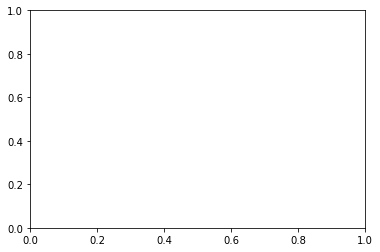

In [48]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
